In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import nltk, re, pprint
from nltk import word_tokenize

DATA_PATH = os.getcwd() + '/data_cleaner/output'

df_C = pd.read_csv(DATA_PATH + '/C.csv')
df_Python = pd.read_csv(DATA_PATH + '/Python.csv')
df_Javascript = pd.read_csv(DATA_PATH + '/Javascript.csv')
df_Go = pd.read_csv(DATA_PATH + '/Go.csv')

In [2]:
df_C.head()

,author,text
0,laruence,Hi: I am thinking of make a release(maybe a ta...
1,laruence,thanks
2,cloudwu,Maybe something wrong with Example 37 in my PC...
3,cloudwu,"When I make Horde3D in mingw32, I got the erro..."
4,cloudwu,"I wrote a lua version of shaderc , today. I th..."


In [3]:
df_C['tokenized_text'] = df_C['text'].apply(word_tokenize)
df_C.head()

,author,text,tokenized_text
0,laruence,Hi: I am thinking of make a release(maybe a ta...,"[Hi, :, I, am, thinking, of, make, a, release,..."
1,laruence,thanks,[thanks]
2,cloudwu,Maybe something wrong with Example 37 in my PC...,"[Maybe, something, wrong, with, Example, 37, i..."
3,cloudwu,"When I make Horde3D in mingw32, I got the erro...","[When, I, make, Horde3D, in, mingw32, ,, I, go..."
4,cloudwu,"I wrote a lua version of shaderc , today. I th...","[I, wrote, a, lua, version, of, shaderc, ,, to..."


In [4]:
df_Go['tokenized_text'] = df_Go['text'].apply(word_tokenize)
df_Python['tokenized_text'] = df_Python['text'].apply(word_tokenize)
df_Javascript['tokenized_text'] = df_Javascript['text'].apply(word_tokenize)

## Average text length

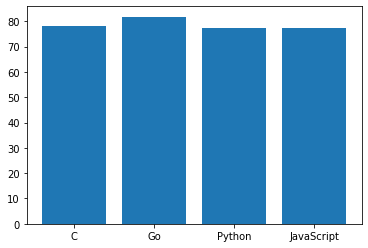

In [5]:
df_C['length'] = df_C['tokenized_text'].apply(len)
df_Go['length'] = df_Go['tokenized_text'].apply(len)
df_Python['length'] = df_Python['tokenized_text'].apply(len)
df_Javascript['length'] = df_Javascript['tokenized_text'].apply(len)

means = [np.mean(df_C['length']), np.mean(df_Go['length']), np.mean(df_Python['length']),
         np.mean(df_Javascript['length'])]
widths = [1, 2, 3, 4]
labels = ['C', 'Go', 'Python', 'JavaScript']
plt.bar(widths, means, tick_label=labels,
        width=0.8)
plt.show()

## Average lexical diversity

How diverse is vocabulary of a single entry?

In [6]:
def lexical_diversity(text):
    return len(set(text)) / len(text)


def percentage(count, total):
    return 100 * count / total

In [7]:
df_C['lex_div'] = df_C['text'].apply(lexical_diversity)
df_Go['lex_div'] = df_Go['text'].apply(lexical_diversity)
df_Python['lex_div'] = df_Python['text'].apply(lexical_diversity)
df_Javascript['lex_div'] = df_Javascript['text'].apply(lexical_diversity)

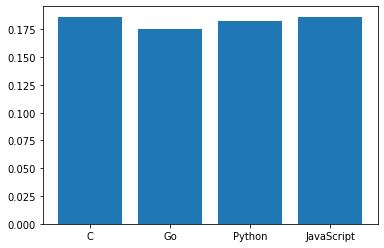

In [8]:
means = [np.mean(df_C['lex_div']), np.mean(df_Go['lex_div']), np.mean(df_Python['lex_div']),
         np.mean(df_Javascript['lex_div'])]
plt.bar(widths, means, tick_label=labels,
        width=0.8)
plt.show()

## Total lexical diversity

How all enries are similar to each other?

In [9]:
all_C = ' '.join(df_C['text'])
all_Go = ' '.join(df_Go['text'])
all_Python = ' '.join(df_Python['text'])
all_Javascript = ' '.join(df_Javascript['text'])

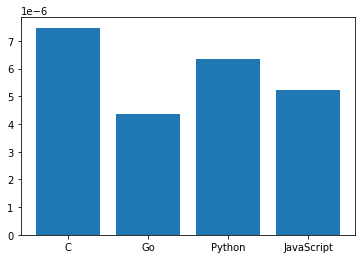

In [10]:
divs = [lexical_diversity(all_C), lexical_diversity(all_Go), lexical_diversity(all_Python),
        lexical_diversity(all_Javascript)]
plt.bar(widths, divs, tick_label=labels,
        width=0.8)
plt.show()

## Average word length

In [11]:
def average(words):
    return (sum(len(word) for word in words) / len(words))


In [12]:

df_C['word_length'] = df_C['tokenized_text'].apply(average)
df_Go['word_length'] = df_Go['tokenized_text'].apply(average)
df_Python['word_length'] = df_Python['tokenized_text'].apply(average)
df_Javascript['word_length'] = df_Javascript['tokenized_text'].apply(average)


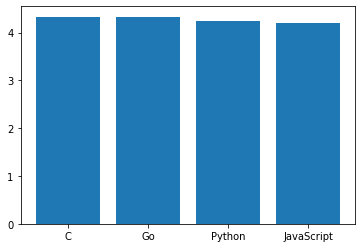

In [13]:
means = [np.mean(df_C['word_length']), np.mean(df_Go['word_length']), np.mean(df_Python['word_length']),
         np.mean(df_Javascript['word_length'])]
plt.bar(widths, means, tick_label=labels,
        width=0.8)
plt.show()

## Count of words over 10 characters

In [14]:
def words_over_10(words):
    sum = 0
    for word in words:
        if (len(word) >= 10):
            sum += 1
    return sum

In [15]:
df_C['long_words'] = df_C['tokenized_text'].apply(words_over_10)
df_Go['long_words'] = df_Go['tokenized_text'].apply(words_over_10)
df_Python['long_words'] = df_Python['tokenized_text'].apply(words_over_10)
df_Javascript['long_words'] = df_Javascript['tokenized_text'].apply(words_over_10)

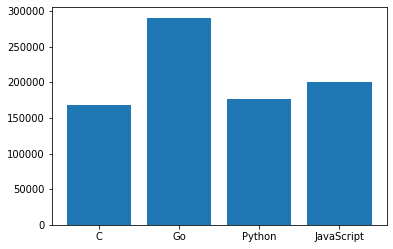

In [16]:
sums = [np.sum(df_C['long_words']), np.sum(df_Go['long_words']), np.sum(df_Python['long_words']),
        np.sum(df_Javascript['long_words'])]
plt.bar(widths, sums, tick_label=labels,
        width=0.8)
plt.show()

## Frequency distribution

In [17]:
# for calculating frequency distribution and saving it to file
def freq_dist(all_lang, filename):
    unique_lang = set(word_tokenize(all_lang))
    freq = []
    i = 0;
    for word in unique_lang:
        freq.append((all_lang.count(word), word))
        i += 1
        print(str(i) + "/" + str(len(unique_lang)))
    freq_lang = sorted(freq, reverse=True)
    df = pd.DataFrame(freq_lang)
    df.rename(columns={0: "number", 1: "word"}, inplace=True)
    df.to_csv(filename, index=False)

In [23]:
from itertools import chain
from multiprocessing import Pool
from nltk import FreqDist


def _get_freq_dist_task(tokenized_texts: list[list[str]]) -> FreqDist:
    return FreqDist(chain.from_iterable(tokenized_texts))


def get_freq_dist(tokenized_text_series: pd.Series) -> FreqDist:
    pool_size = os.cpu_count()

    with Pool(pool_size) as pool:
        return sum(
            pool.imap_unordered(_get_freq_dist_task, np.array_split(tokenized_text_series.values, pool_size)),
            start=FreqDist())

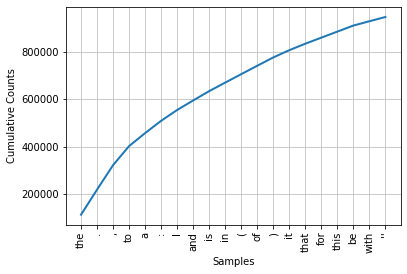

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

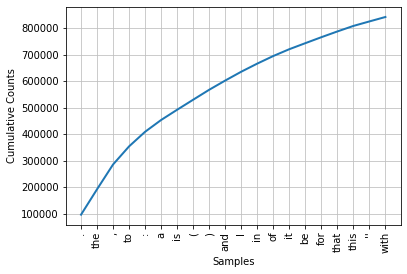

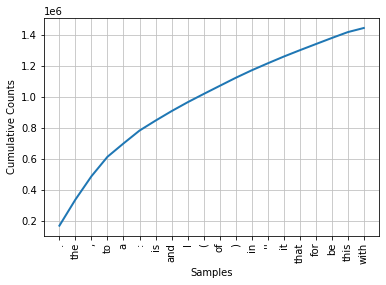

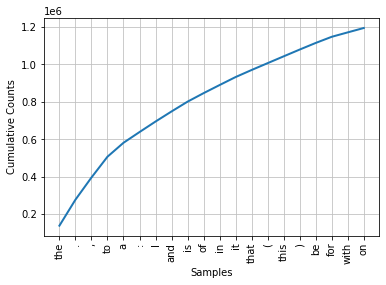

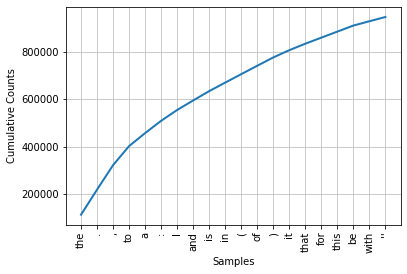

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [26]:
freq_dist_C = get_freq_dist(df_C['tokenized_text'])
freq_dist_C.plot(20, cumulative=True)

freq_dist_Go = get_freq_dist(df_Go['tokenized_text'])
freq_dist_Go.plot(20, cumulative=True)

freq_dist_Javascript = get_freq_dist(df_Javascript['tokenized_text'])
freq_dist_Javascript.plot(20, cumulative=True)

freq_dist_Python = get_freq_dist(df_Python['tokenized_text'])
freq_dist_Python.plot(20, cumulative=True)

In [27]:
print(all_C.split()[100])

because


In [28]:
len(set(all_C.split()))

196259

In [29]:
len(set(word_tokenize(all_C)))


136333